# Random forest predictions
This notebook ingests the positive and negative training vectors as well as the prediction set as generated by the notebook ``ExtractDifferenceVectors.ipynb``. It then perfoms Random forest learning and ranks the prediction set.

In [1]:
import pandas as pd
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath('..'))
from kcet import KcetParser

In [2]:
data_directory = 'data'
if not os.path.isdir(data_directory):
    raise FileNotFoundError("Could not find data directory")
prediction_pickle_path = os.path.join(data_directory, "predictions.pkl")
positive_diff_pickle_path = os.path.join(data_directory, "positive-vectors.pkl")
negative_diff_pickle_path = os.path.join(data_directory, "negative-vectors.pkl")
diff_vectors_prediction = pd.read_pickle(prediction_pickle_path)
diff_vectors_pos = pd.read_pickle(positive_diff_pickle_path)
diff_vectors_neg = pd.read_pickle(negative_diff_pickle_path)

In [3]:
diff_vectors_prediction.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene23552-meshd000008,1.225720,2.219805,-1.159192,-0.913386,1.242244,0.004557,-0.557847,-0.904537,-0.135320,0.972034,...,-1.242775,0.026413,-0.094516,-0.482394,0.212582,0.301373,-0.230201,0.222967,-0.262096,-0.199647
ncbigene23552-meshd000069293,0.728423,0.710524,-0.547860,-0.670773,0.928276,-0.442250,-1.206818,-1.240632,0.583069,0.921462,...,-1.901131,0.327931,0.207080,-1.047767,-0.375792,1.227519,-0.334099,0.439315,0.878214,-0.887344
ncbigene23552-meshd000069584,0.704195,2.368731,-0.721249,-0.975288,1.571413,0.523479,-1.412002,-1.116571,-0.460344,0.193849,...,-0.840250,0.282295,-0.871796,-1.058958,0.402296,0.428840,-0.754313,0.306938,0.330441,0.462290
ncbigene23552-meshd000070779,0.912242,2.347372,-0.902853,-0.862418,-0.174117,-0.025160,-0.054016,-0.790153,-0.085269,1.285809,...,-0.897832,-0.262245,-0.092310,-1.144869,-0.269114,1.008527,-0.859037,0.939902,1.008549,-0.443027
ncbigene23552-meshd000071380,2.146233,1.374384,-0.688913,0.034746,1.313125,0.797840,-1.370878,-0.273002,1.072562,1.761501,...,-1.722041,-0.544126,-0.546446,-0.807326,0.847525,1.178180,-0.027069,0.244723,0.515210,0.377675


In [4]:
diff_vectors_pos.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene1019-meshd001943,0.216646,3.655876,1.071927,-0.722951,0.367680,0.465755,0.418794,-2.099517,-1.790263,-0.213371,...,-2.022566,-0.317103,-1.421989,-0.204653,0.463428,-0.242397,-0.491233,0.427644,-2.196168,1.819980
ncbigene1021-meshd001943,0.030452,3.720027,1.016965,-1.051610,0.024833,0.982127,0.489182,-2.534349,-1.814148,0.040062,...,-1.650203,-0.357809,-0.631133,-0.098130,0.589177,-0.401167,-0.898499,0.290497,-2.418543,1.837906
ncbigene4921-meshd009396,-2.670899,2.733067,-0.569561,-3.087993,-0.103932,-0.822189,2.730327,-0.055104,-1.066800,-0.691886,...,-0.827484,0.534198,3.701657,0.468604,0.684156,-0.799683,-1.548203,1.367404,0.015826,0.172598
ncbigene1956-meshd002289,-0.658227,1.228249,-0.556157,-0.571083,-0.107215,0.426374,0.671859,0.527287,-0.252452,1.403538,...,-1.924055,0.002242,0.494866,-0.138703,0.016181,-1.415368,0.792387,-0.136395,-0.910239,1.851647
ncbigene2064-meshd002289,-1.328087,-0.204334,-1.170295,-1.143805,-0.218962,0.010136,1.089562,1.061568,-0.133885,1.831318,...,-0.472625,-0.264935,0.501440,-0.217320,0.255144,-1.773365,1.888879,-0.586480,-1.102478,0.539014


In [5]:
diff_vectors_neg.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene5599-meshd000074723,2.655529,0.504851,0.625748,1.518887,0.945556,0.548947,-2.198937,-0.326028,1.382686,0.638925,...,-2.161751,-0.056356,-1.717769,-0.699362,-0.622357,0.198742,0.420550,0.625391,1.434420,-0.377444
ncbigene203447-meshd047688,-1.678044,1.449732,-0.384489,-2.067419,-0.351659,-0.454225,1.441193,-1.080663,-1.493859,0.102219,...,1.337292,1.639545,0.725752,-0.420067,0.221270,-0.651651,-1.630625,0.486522,-1.047029,-0.520121
ncbigene2185-meshd017253,4.715750,-0.251379,0.055102,3.493889,1.913120,1.348085,-2.688731,1.778545,3.214343,1.446959,...,-2.307206,-2.017854,-1.561508,-0.247136,0.705275,2.155442,2.416265,-0.259953,1.370509,1.364926
ncbigene85443-meshd000232,-1.346377,1.916956,-0.440202,-1.386843,-1.183735,-0.441262,3.171287,-1.389849,-1.990137,0.173341,...,0.872434,1.502396,1.260150,0.176495,-0.537387,-0.513928,-1.705507,0.625129,-0.191481,-0.523272
ncbigene5292-meshd018305,0.779350,0.717966,-0.985452,-1.111991,-0.782443,-0.133464,2.868683,-0.082839,-0.340068,0.931564,...,-1.610746,-0.219597,1.374354,0.074545,0.528014,-0.384216,-0.134682,0.715625,0.642717,1.363432


# Random Forest
### 1. Training set
Create the training set by concatenating ``diff_vectors_pos`` and ``diff_vectors_neg``.

In [6]:
X_train = pd.concat([diff_vectors_pos,diff_vectors_neg])
print("Total training vectors: %d" % len(X_train))

Total training vectors: 5066


In [7]:
label_1 = np.ones(diff_vectors_pos.shape[0])
label_0 = np.zeros(diff_vectors_neg.shape[0])
y_train = np.concatenate((label_1,label_0))
print("Total training labels: %d" % len(y_train))

Total training labels: 5066


### 2. Test set. 
The test set is the prediction set with one label (either 0 or 1)

In [8]:
X_test = diff_vectors_prediction
label_test = np.ones(diff_vectors_prediction.shape[0])
y_test = label_test

## Parameters of random forest that are used to find the best model.
#### Here, I used only n_estimators (number of trees) but we may add more parameters like min_samples_leaf or max_depth, too.

In [9]:
param_grid = {
                 'n_estimators': [10, 20, 50, 100, 150, 200],
                # 'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
                # 'max_depth' : np.linspace(1, 10, 5, endpoint=True),
             }

## Search over the parameters to choose the best model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

clf = RandomForestClassifier()
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train,y_train)

best_model = grid_clf.best_estimator_

# Link prediction

In [11]:
y_pred = best_model.predict(X_test)
yproba = best_model.predict_proba(X_test)[::,1]

## Decoding results
The ``KcetParser`` class has methods that take the raw X_test vectors and create an annotated dataframe by
decoding strings like ``ncbigene5599-meshd000074723`` to show the corresponding gene symbols and MeSH labels (neoplasms),
and also placing the probabilities of the predictions in the corresponding rows. The resulting dataframe
is sorted according to probability. The ``deleteEmbeddings`` argument determines whether we only return the
three columns ``gene_symbol1``, ``cancer``, and ``probability``.

In [12]:
from kcet import KcetParser
kcetParser = KcetParser()
predictions = kcetParser.decode_predictions(vectors=X_test, probabilities=yproba, deleteEmbeddings=True)
predictions.head()

,gene_symbol,cancer,probability
ncbigene1956-meshd018198,EGFR,"Mixed Tumor, Malignant",0.94
ncbigene3717-meshd006528,JAK2,"Carcinoma, Hepatocellular",0.90
ncbigene3791-meshd018198,KDR,"Mixed Tumor, Malignant",0.90
ncbigene3480-meshd006528,IGF1R,"Carcinoma, Hepatocellular",0.90
ncbigene5747-meshd006528,PTK2,"Carcinoma, Hepatocellular",0.84


In [13]:
print("Total number of predictions:", len(predictions))

Total number of predictions: 329669


In [14]:
predictions.to_csv("predictions_2021.tsv",index=False,sep="\t")

## Histogram of probabilities 

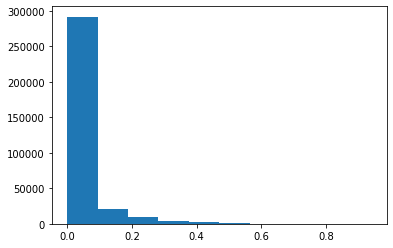

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline  
from numpy import array
gn=array(predictions.loc[predictions["probability"] < 1]["probability"])
plt.hist(gn.astype('float'));